<center><font size="10"> 🔥Perceptron🔥 </font></center>

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [9]:
iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

C:\Users\unnikris\AppData\Local\Temp\ipykernel_9688\3825482411.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int)


Perceptron(random_state=42)

In [10]:
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([1])

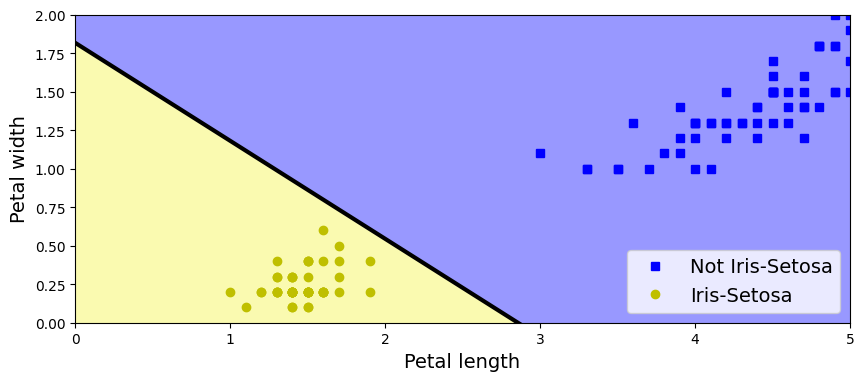

In [12]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
plt.show()

In [13]:
import tensorflow as tf
from tensorflow import keras


In [14]:
tf.__version__

'2.10.0'

In [15]:
keras.__version__

'2.10.0'

### Image Classification using KERAS (Sequntial API) {Classification MLP}

In [16]:
fashion_mnist = keras.datasets.fashion_mnist

In [17]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [19]:
X_train_full.shape

(60000, 28, 28)

In [21]:
y_train_full.shape

(60000,)

#### We are going to train the neural network using Gradient Descent, we must scale the input features. For simplicity, we just scale the pixel intensities down to the 0-1 range by dividing them by 255.0
#### Also the dataset is split into test and train but no validation so creating a validation set too also scaled down to the range of 0-1

In [25]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

#### We'd need a list of class names that specifies the label of that item

In [26]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [27]:
class_names[y_train[0]]

'Coat'

#### Lets display the items in the dataset

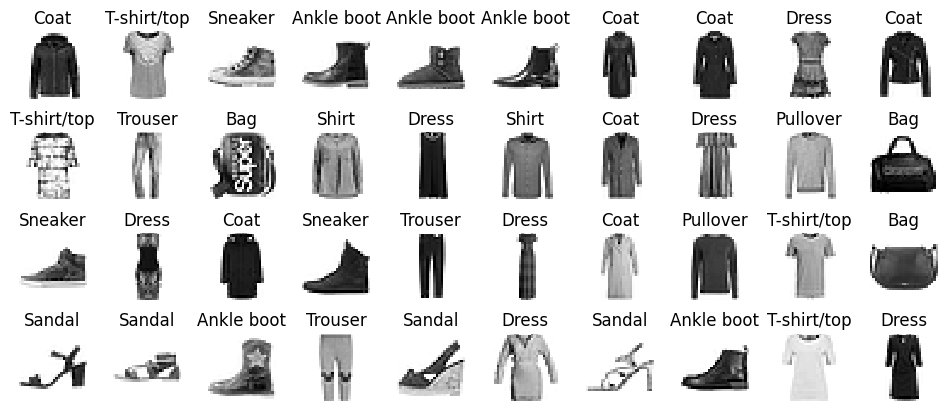

In [29]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [32]:
model = keras.models.Sequential([
        keras.layers.Flatten(input_shape = [28,28]),
        keras.layers.Dense(300, activation = "relu"),
        keras.layers.Dense(100, activation = 'relu'),
        keras.layers.Dense(10, activation = 'softmax'),
        ])

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss='sparse_categorical_crossentropy',
            optimizer = "sgd",
            metrics = ['accuracy'])

In [34]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.7046 - accuracy: 0.7727 - val_loss: 0.5018 - val_accuracy: 0.8262
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4834 - accuracy: 0.8319 - val_loss: 0.4312 - val_accuracy: 0.8568
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4400 - accuracy: 0.8456 - val_loss: 0.4191 - val_accuracy: 0.8564
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4131 - accuracy: 0.8552 - val_loss: 0.4120 - val_accuracy: 0.8514
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3932 - accuracy: 0.8621 - val_loss: 0.3894 - val_accuracy: 0.8642
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3764 - accuracy: 0.8673 - val_loss: 0.3651 - val_accuracy: 0.8720
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3629 - accuracy: 0.8713 - val_loss: 0.3666 - val_accurac

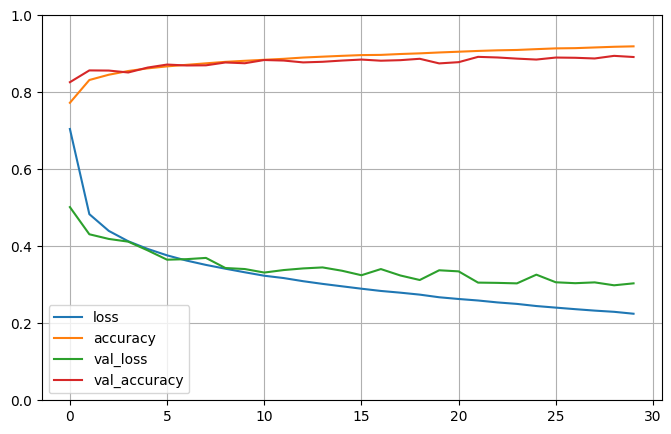

In [37]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

#### Both the training and validation accuracy steadily increase during training, while the training and validation loss decrease.
#### Moreover, the validation curves are quite close to the training curves, which means that there is not too much overfitting.


In [49]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3307 - accuracy: 0.8818


[0.3306522071361542, 0.8817999958992004]

#### Lets see the NN in action🔥🔥

In [50]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 103ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.01, 0.  , 0.96],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [52]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 24ms/step


array([9, 2, 1], dtype=int64)

In [53]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

#### We chose the first 3 images from the test set and the model predicted that they might be 'Ankle boot', 'Pullover', 'Trouser.
#### Lets print X_new

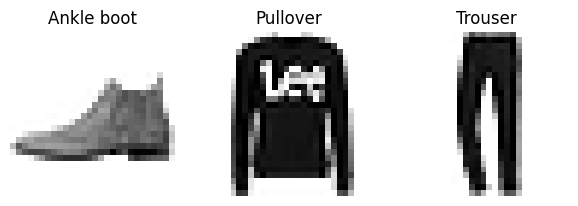

In [54]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

#### So the model does correctly identify them

### Regression MLP

In [55]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [58]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

In [59]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [60]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [62]:
model = keras.models.Sequential([
        keras.layers.Dense(30, activation = "relu", input_shape = X_train.shape[1:]),
        keras.layers.Dense(1)
])


In [63]:
model.compile(loss = 'mean_squared_error', optimizer="sgd")
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/30
363/363 [==============================] - 2s 5ms/step - loss: 0.9683 - val_loss: 2.1549
Epoch 2/30
363/363 [==============================] - 2s 6ms/step - loss: 1.3695 - val_loss: 0.4649
Epoch 3/30
363/363 [==============================] - 2s 6ms/step - loss: 0.4516 - val_loss: 0.4815
Epoch 4/30
363/363 [==============================] - 2s 6ms/step - loss: 0.4596 - val_loss: 0.5351
Epoch 5/30
363/363 [==============================] - 2s 5ms/step - loss: 0.4605 - val_loss: 0.4217
Epoch 6/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4201 - val_loss: 0.4124
Epoch 7/30
363/363 [==============================] - 2s 6ms/step - loss: 0.4104 - val_loss: 0.4053
Epoch 8/30
363/363 [==============================] - 2s 6ms/step - loss: 0.3995 - val_loss: 0.3920
Epoch 9/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3953 - val_loss: 0.3905
Epoch 10/30
363/363 [==============================] - 2s 6ms/step - loss: 0.3858 - val_loss: 0.3807

In [64]:
y_pred

array([[4.1551847],
       [0.9125163],
       [2.5452561]], dtype=float32)

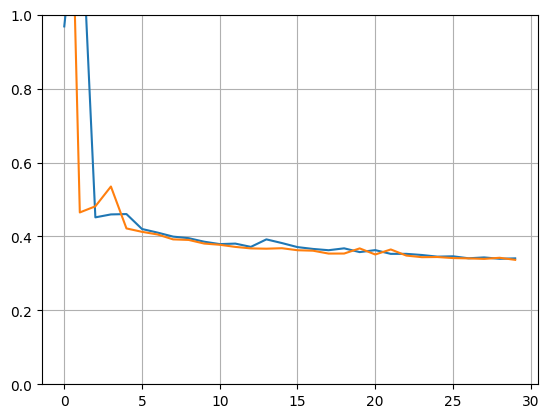

In [65]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Wide and Deep Neural Network
#### This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path). In contrast, a regular MLP forces all the data to flow through the full stack of layers, thus simple patterns in the data may end up being distorted by this sequence of transformations.

In [66]:
input = keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation = 'relu')(input)
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1)
concat = keras.layers.Concatenate()([input, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs = [input], outputs = [output])

In [67]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_8 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_9 (Dense)                (None, 30)           930         ['dense_8[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_9[0][0]']            

In [68]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 3s 6ms/step - loss: 1.6466 - val_loss: 0.9406
Epoch 2/20
363/363 [==============================] - 2s 6ms/step - loss: 0.8846 - val_loss: 0.8125
Epoch 3/20
363/363 [==============================] - 2s 7ms/step - loss: 0.7960 - val_loss: 0.7491
Epoch 4/20
363/363 [==============================] - 3s 7ms/step - loss: 0.7384 - val_loss: 0.7015
Epoch 5/20
363/363 [==============================] - 2s 6ms/step - loss: 0.6948 - val_loss: 0.6643
Epoch 6/20
363/363 [==============================] - 2s 6ms/step - loss: 0.6604 - val_loss: 0.6348
Epoch 7/20
363/363 [==============================] - 2s 6ms/step - loss: 0.6331 - val_loss: 0.6123
Epoch 8/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6109 - val_loss: 0.5938
Epoch 9/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5926 - val_loss: 0.5774
Epoch 10/20
363/363 [==============================] - 2s 6ms/step - loss: 0.5775 - val_loss: 0.5639

In [69]:
input_A = keras.layers.Input(shape = [5], name='wide_input')
input_B = keras.layers.Input(shape = [6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation = 'relu')(input_B)
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name = 'output')(concat)
model = keras.Model(inputs = [input_A, input_B], outputs = [output])

In [70]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_11 (Dense)               (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_12 (Dense)               (None, 30)           930         ['dense_11[0][0]']               
                                                                                            

In [72]:
model.compile(loss='mse',optimizer=keras.optimizers.SGD(learning_rate= 1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=30, validation_data = ((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/30
363/363 [==============================] - 3s 6ms/step - loss: 2.4565 - val_loss: 0.9480
Epoch 2/30
363/363 [==============================] - 3s 8ms/step - loss: 0.7976 - val_loss: 0.7033
Epoch 3/30
363/363 [==============================] - 3s 7ms/step - loss: 0.6767 - val_loss: 0.6512
Epoch 4/30
363/363 [==============================] - 3s 7ms/step - loss: 0.6418 - val_loss: 0.6264
Epoch 5/30
363/363 [==============================] - 2s 6ms/step - loss: 0.6225 - val_loss: 0.6085
Epoch 6/30
363/363 [==============================] - 2s 6ms/step - loss: 0.6061 - val_loss: 0.5935
Epoch 7/30
363/363 [==============================] - 3s 8ms/step - loss: 0.5928 - val_loss: 0.5796
Epoch 8/30
363/363 [==============================] - 2s 7ms/step - loss: 0.5797 - val_loss: 0.5673
Epoch 9/30
363/363 [==============================] - 3s 7ms/step - loss: 0.5680 - val_loss: 0.5558
Epoch 10/30
363/363 [==============================] - 3s 7ms/step - loss: 0.5573 - val_loss: 0.5459

In [90]:
np.random.seed(42)
tf.random.set_seed(42)
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [91]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 4s 9ms/step - loss: 2.6006 - main_output_loss: 2.3892 - aux_output_loss: 4.5033 - val_loss: 1.3200 - val_main_output_loss: 1.0767 - val_aux_output_loss: 3.5090
Epoch 2/20
363/363 [==============================] - 3s 8ms/step - loss: 1.1411 - main_output_loss: 0.9415 - aux_output_loss: 2.9373 - val_loss: 0.9429 - val_main_output_loss: 0.7926 - val_aux_output_loss: 2.2963
Epoch 3/20
363/363 [==============================] - 3s 10ms/step - loss: 0.8762 - main_output_loss: 0.7436 - aux_output_loss: 2.0692 - val_loss: 0.8038 - val_main_output_loss: 0.7000 - val_aux_output_loss: 1.7377
Epoch 4/20
363/363 [==============================] - 4s 11ms/step - loss: 0.7726 - main_output_loss: 0.6720 - aux_output_loss: 1.6782 - val_loss: 0.7365 - val_main_output_loss: 0.6516 - val_aux_output_loss: 1.5007
Epoch 5/20
363/363 [==============================] - 4s 10ms/step - loss: 0.7205 - main_output_loss: 0.6331 - aux_output_loss: 1.5068 - val_l

In [78]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 63ms/step


In [82]:
print(y_pred_main, '\n\n', y_pred_aux)

[[3.814389 ]
 [1.1598544]
 [2.4097817]] 

 [[2.2504911]
 [2.3134995]
 [2.1625566]]


#### The above functional API can be written in a oop format

In [87]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    


In [88]:
model = WideAndDeepModel()

In [89]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 4s 10ms/step - loss: 2.1628 - output_1_loss: 2.0115 - output_2_loss: 3.5244 - val_loss: 1.0597 - val_output_1_loss: 0.8924 - val_output_2_loss: 2.5655
Epoch 2/10
363/363 [==============================] - 3s 9ms/step - loss: 0.9476 - output_1_loss: 0.7893 - output_2_loss: 2.3719 - val_loss: 0.8418 - val_output_1_loss: 0.7209 - val_output_2_loss: 1.9299
Epoch 3/10
363/363 [==============================] - 3s 9ms/step - loss: 0.8097 - output_1_loss: 0.6879 - output_2_loss: 1.9065 - val_loss: 0.7622 - val_output_1_loss: 0.6657 - val_output_2_loss: 1.6310
Epoch 4/10
363/363 [==============================] - 3s 9ms/step - loss: 0.7443 - output_1_loss: 0.6435 - output_2_loss: 1.6508 - val_loss: 0.7136 - val_output_1_loss: 0.6291 - val_output_2_loss: 1.4741
Epoch 5/10
363/363 [==============================] - 3s 9ms/step - loss: 0.7020 - output_1_loss: 0.6131 - output_2_loss: 1.5017 - val_loss: 0.6808 - val_output_1_loss: 0.6031 - val_o

#### Save your model

In [92]:
model.save("FunctionalAPI.h5")

#### Restore your model

In [109]:
model = keras.models.load_model("FunctionalAPI.h5")

#### Do callbacks and save the best model on a validation set {A way of doing early stopping}

In [96]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("FunctionalAPI.h5", save_best_only=True)
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=10,
                    validation_data = ([X_valid_A, X_valid_B], [y_valid, y_valid]) ,callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 3s 9ms/step - loss: 0.4970 - main_output_loss: 0.4571 - aux_output_loss: 0.8563 - val_loss: 0.4916 - val_main_output_loss: 0.4520 - val_aux_output_loss: 0.8482
Epoch 2/10
363/363 [==============================] - 4s 10ms/step - loss: 0.4948 - main_output_loss: 0.4557 - aux_output_loss: 0.8469 - val_loss: 0.4890 - val_main_output_loss: 0.4500 - val_aux_output_loss: 0.8395
Epoch 3/10
363/363 [==============================] - 3s 9ms/step - loss: 0.4926 - main_output_loss: 0.4541 - aux_output_loss: 0.8388 - val_loss: 0.4870 - val_main_output_loss: 0.4489 - val_aux_output_loss: 0.8304
Epoch 4/10
363/363 [==============================] - 3s 8ms/step - loss: 0.4914 - main_output_loss: 0.4539 - aux_output_loss: 0.8291 - val_loss: 0.4847 - val_main_output_loss: 0.4472 - val_aux_output_loss: 0.8221
Epoch 5/10
363/363 [==============================] - 3s 8ms/step - loss: 0.4884 - main_output_loss: 0.4513 - aux_output_loss: 0.8223 - val_los

#### Another method of early stopping

In [102]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=10,
                    validation_data = ([X_valid_A, X_valid_B], [y_valid, y_valid]) ,callbacks=[early_stopping_cb])

Epoch 1/10
363/363 [==============================] - 2s 6ms/step - loss: 0.4626 - main_output_loss: 0.4337 - aux_output_loss: 0.7232 - val_loss: 0.4580 - val_main_output_loss: 0.4291 - val_aux_output_loss: 0.7182
Epoch 2/10
363/363 [==============================] - 3s 8ms/step - loss: 0.4614 - main_output_loss: 0.4328 - aux_output_loss: 0.7189 - val_loss: 0.4567 - val_main_output_loss: 0.4281 - val_aux_output_loss: 0.7140
Epoch 3/10
363/363 [==============================] - 3s 8ms/step - loss: 0.4600 - main_output_loss: 0.4317 - aux_output_loss: 0.7146 - val_loss: 0.4556 - val_main_output_loss: 0.4275 - val_aux_output_loss: 0.7089
Epoch 4/10
363/363 [==============================] - 2s 6ms/step - loss: 0.4589 - main_output_loss: 0.4310 - aux_output_loss: 0.7100 - val_loss: 0.4540 - val_main_output_loss: 0.4261 - val_aux_output_loss: 0.7046
Epoch 5/10
363/363 [==============================] - 2s 6ms/step - loss: 0.4573 - main_output_loss: 0.4297 - aux_output_loss: 0.7060 - val_loss

#### Using TensorBoard to Visualize

In [99]:
import os
import time

In [100]:
root_logdir = os.path.join(os.curdir,"my_logs")

In [101]:
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [110]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [111]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=30,
                    validation_data = ([X_valid_A, X_valid_B], [y_valid, y_valid]) ,callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 4s 10ms/step - loss: 0.4626 - main_output_loss: 0.4337 - aux_output_loss: 0.7232 - val_loss: 0.4580 - val_main_output_loss: 0.4291 - val_aux_output_loss: 0.7182
Epoch 2/30
363/363 [==============================] - 4s 10ms/step - loss: 0.4614 - main_output_loss: 0.4328 - aux_output_loss: 0.7189 - val_loss: 0.4567 - val_main_output_loss: 0.4281 - val_aux_output_loss: 0.7140
Epoch 3/30
363/363 [==============================] - 4s 10ms/step - loss: 0.4600 - main_output_loss: 0.4317 - aux_output_loss: 0.7146 - val_loss: 0.4556 - val_main_output_loss: 0.4275 - val_aux_output_loss: 0.7089
Epoch 4/30
363/363 [==============================] - 3s 10ms/step - loss: 0.4589 - main_output_loss: 0.4310 - aux_output_loss: 0.7100 - val_loss: 0.4540 - val_main_output_loss: 0.4261 - val_aux_output_loss: 0.7046
Epoch 5/30
363/363 [==============================] - 3s 9ms/step - loss: 0.4573 - main_output_loss: 0.4297 - aux_output_loss: 0.7060 - val_

In [115]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

#### TensorBoard summary

In [116]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        
        data = (np.random.randn(100) + 2) * step / 100  # gets larger
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        
        images = np.random.rand(2, 32, 32, 3) * step / 1000  # gets brighter
        tf.summary.image("my_images", images, step=step)
        
        texts = ["The step is " + str(step), "Its square is " + str(step ** 2)]
        tf.summary.text("my_text", texts, step=step)
        
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

#### Finetuning NN hyperparameters

#### First create a function of our model

In [117]:
def build_model(n_hidden = 1, n_nuerons = 30, learning_rate = 3e-3, input_shape = [8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape = input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr = learning_rate)
    model.compile(loss = 'mse', optimizer=optimizer)
    return model

#### Wrap it using KerasRegressor (or KerasClassifier incase of classification)

In [118]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

C:\Users\unnikris\AppData\Local\Temp\ipykernel_9688\1709004121.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [119]:
keras_reg.fit(X_train, y_train, epochs=100,
                validation_data=(X_valid, y_valid),
                callbacks = [keras.callbacks.EarlyStopping(patience=10)])

mse_test = keras_reg.score(X_test,y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100


c:\Users\unnikris\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


363/363 [==============================] - 2s 5ms/step - loss: 3.1023 - val_loss: 0.8265
Epoch 2/100
363/363 [==============================] - 2s 5ms/step - loss: 0.7493 - val_loss: 0.6586
Epoch 3/100
363/363 [==============================] - 1s 4ms/step - loss: 0.6414 - val_loss: 0.6186
Epoch 4/100
363/363 [==============================] - 1s 4ms/step - loss: 0.6092 - val_loss: 0.5924
Epoch 5/100
363/363 [==============================] - 1s 4ms/step - loss: 0.5851 - val_loss: 0.5732
Epoch 6/100
363/363 [==============================] - 2s 5ms/step - loss: 0.5717 - val_loss: 0.5616
Epoch 7/100
363/363 [==============================] - 2s 5ms/step - loss: 0.5627 - val_loss: 0.5506
Epoch 8/100
363/363 [==============================] - 2s 5ms/step - loss: 0.5531 - val_loss: 0.5446
Epoch 9/100
363/363 [==============================] - 2s 4ms/step - loss: 0.5548 - val_loss: 0.5369
Epoch 10/100
363/363 [==============================] - 1s 4ms/step - loss: 0.5439 - val_loss: 0.5328
E

In [123]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

params = {
        "n_hidden":[0,1,2,3],
        "n_nuerons": np.arange(1,100),
        "learning_rate": reciprocal(3e-4, 3e-2),
        }


rnd_search_cv = RandomizedSearchCV(keras_reg, params , n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                validation_data=(X_valid, y_valid),
                callbacks = [keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100


c:\Users\unnikris\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 4ms/step - loss: 2.0262 - val_loss: 0.8788
Epoch 2/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7436 - val_loss: 0.6672
Epoch 3/100
242/242 [==============================] - 1s 4ms/step - loss: 0.6647 - val_loss: 0.6323
Epoch 4/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6361 - val_loss: 0.6022
Epoch 5/100
242/242 [==============================] - 1s 6ms/step - loss: 0.6143 - val_loss: 0.5816
Epoch 6/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5923 - val_loss: 0.5651
Epoch 7/100
242/242 [==============================] - 1s 6ms/step - loss: 0.5830 - val_loss: 0.5604
Epoch 8/100
242/242 [==============================] - 1s 5ms/step - loss: 0.5987 - val_loss: 0.5429
Epoch 9/100
242/242 [==============================] - 1s 6ms/step - loss: 0.5811 - val_loss: 0.5365
Epoch 10/100
242/242 [==============================] - 1s 6ms/step - loss: 0.5687 - val_loss: 0.5387
E

c:\Users\unnikris\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [-7.13460664e-01 -6.45470270e+00 -5.34945687e-01 -5.77047021e+01
 -6.45470270e+00 -5.34997781e-01             nan             nan
 -6.45470270e+00 -1.04814343e+13]
  warnings.warn(


363/363 [==============================] - 2s 4ms/step - loss: 1.7684 - val_loss: 0.6925
Epoch 2/100
363/363 [==============================] - 1s 4ms/step - loss: 0.6132 - val_loss: 0.5789
Epoch 3/100
363/363 [==============================] - 2s 4ms/step - loss: 0.5720 - val_loss: 0.5505
Epoch 4/100
363/363 [==============================] - 2s 4ms/step - loss: 0.5711 - val_loss: 0.5421
Epoch 5/100
363/363 [==============================] - 1s 4ms/step - loss: 0.5523 - val_loss: 0.5295
Epoch 6/100
363/363 [==============================] - 1s 4ms/step - loss: 0.5581 - val_loss: 0.5690
Epoch 7/100
363/363 [==============================] - 2s 4ms/step - loss: 0.5669 - val_loss: 0.5286
Epoch 8/100
363/363 [==============================] - 1s 4ms/step - loss: 0.5398 - val_loss: 0.5292
Epoch 9/100
363/363 [==============================] - 2s 4ms/step - loss: 0.5848 - val_loss: 0.5242
Epoch 10/100
363/363 [==============================] - 2s 6ms/step - loss: 0.5373 - val_loss: 0.5220
E

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x000002323F9AD1F0>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000232605AD790>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_nuerons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [124]:
rnd_search_cv.best_params_

{'learning_rate': 0.005911163963108688, 'n_hidden': 2, 'n_nuerons': 38}

In [125]:
rnd_search_cv.best_score_

-0.5349456866582235

In [126]:
model = rnd_search_cv.best_estimator_.model

In [127]:
model.save("Best_model.h5")